# Multinomial Logistic Regressiion from Scratch
- Fundamental of all deep learing operations, concerning classificaiton
- Multinomial - used multinomial distributions to derive the likelihood.....
              - multiclass version of logistic regression


#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, k); theta/w/weights.shape = (n,k)`

    What should $g(x)$ input and output?

    input  = X : (m,n)
    output = yhat : (m,k)

    Mathematially, $g(x)$ an adapted version of the sigmoid formula, so that it outputs (m,k). We called this $g(x)$ the **softmax** function.
    
    $$ h = P(y = c | \theta) = \frac{e^{\mathbf{X}\theta_c}}{\sum_{i=1}^k e^{\mathbf{X}\theta_c}}$$

    Divison makes sure the probability sums to 1

    Why $e$ 
    - $e$ always give positive number, so it's a perfect guy to calculate probability!
    - But hey, Chaky, $e$ to the power of something gives me some number, 
    like very ihg number, like 8103...., so how it can be probability
        - Ans : very simple, just divide by all e, then they will be frac of 1
    - Derivative of e cancels nicely with log:
    

    Why is called softmax?
    - What is hardmax ==> [2,3,4] ==> [0,0,1]
        - The y vector only probability of either 1 or 0
    - softmax: ==> [2,3,4] ==> [0.05,0.15,0.8] addup to 1


2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        Note: 
        - If y = [0,0,1,0], and yhat = [0.1,0.1,0.7,0.1], then J must be low
            - y * h = [0,0,0.7,0]
        - If y = [0,0,1,0], and yhat = [0.9,0.03,0.03,0.04], then J must be High
            - y * h = [0,0,0.03,0]

    $$J = -\sum_{i=1}^m \mathbf{Y}^{(i)}* log({\mathbf{H}}^{(i)})$$
             

    2.2 $$\frac{\partial J}{\partial \theta_j} = \mathbf{X}^T ({\mathbf{H}} - \mathbf{Y})$$

3. Update the theta 

    $$\theta := \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

## Let's code

In [1]:
import numpy as np
X = np.array([[1,3,8],[4,8,1]]) #X with two samples, and three features
X.shape

(2, 3)

In [2]:
#initial y = [2,3] #k = 3, which i have class 1,2,3
#but in ML/DL, we DON'T DEFINE y LIKE THIS
#we define as a one-hot encoded vectors

#for the 1st sample, the probability of being class 1 = 0; class 2 = 1; class 3 = 0
y = np.array([[0,1,0],[0,0,1]])
y.shape #(m,k) where k is number of classes

#with this format, you can get probability of each class, not absolutely the class
#which is silly.... because every prediction is probabiliistic

#i also want to let you know how yhat typically look likes
#the behavior is the probability sums to 1
#the probability of class 1 is 0.05, class2 is 0.86, class 3 is 0.09
yhat_example = np.array([[0.05,0.86,0.09],[0.3,0.3,0.4]])
yhat_example.shape #(m,k)

#duriing like real prediction, we take the index with the highest probability
#this is what i want - [2,3]
#so how to ocnvert yhat_example to [2,3]; Ans: argmax
np.argmax(yhat_example,axis=1) #since the index starts at 0
#so here,let's assume the class is 0,1,2

array([1, 2], dtype=int64)

In [3]:
'''
X : (m,n)
w/theta/weight : (?,?)
y : (m,k)
(m,n) @ (n,k) = (m,k)
'''
# w = np.ones((X.shape[1],len(y.unique())))
#assuming my y is not yet one-hot encoded....

'\nX : (m,n)\nw/theta/weight : (?,?)\ny : (m,k)\n(m,n) @ (n,k) = (m,k)\n'

 $$ h = P(y = c | \theta) = \frac{e^{\mathbf{X}\theta_c}}{\sum_{i=1}^k e^{\mathbf{X}\theta_c}}$$

In [4]:
X.shape

(2, 3)

In [5]:
theta = np.arange(9).reshape((X.shape[1],3))
theta

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [6]:
#so please write the softmax function,
#can calculate the yhat wuth the given data
def softmax(X,theta):
    return np.exp(X @ theta)/np.sum(np.exp(X @ theta), axis = 1, keepdims=True) #.reshape(-1,1)

yhat = softmax(X,theta) #(2,3) @ (3,3) = (2,3)
sum = yhat.sum(axis=1)

assert yhat.shape == (X.shape[0],3)
assert np.all(sum == 1) #True or False statement 

### Cross Entropy Loss
$$J = -\sum_{i=1}^m \mathbf{y}^{(i)}* log({\mathbf{h}}^{(i)})$$

In [7]:
#1. Implement this loss function - crossentropy 
def crossentropy(Y,H):
    grad = - np.sum(Y*np.log(H)) #because this should five me one number, because J is a number
    return grad

#2. create a y, a good yhat, a bad yaht
y = np.array([[0,0,1,0]]) #(1,k)
yhat_good = np.array([[0.01,0.03,0.9,0.03]])
yhat_bad = np.array([[0.3,0.3,0.1,0.3]])
#3. And check the loss. The good yhat should have low loss, and bad yhat should high loss
good = crossentropy(y,yhat_good)
bad = crossentropy(y,yhat_bad)
print(f"{good,bad = }")
#4. Optional: try to understand what does 'log' do to h

good,bad = (0.10536051565782628, 2.3025850929940455)


Text(0, 0.5, 'loss')

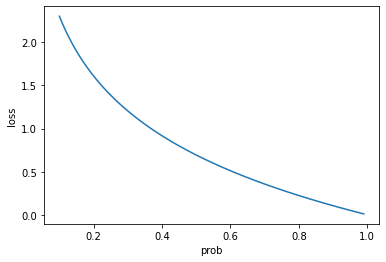

In [8]:
import matplotlib.pyplot as plt

yhat = np.linspace(0.1,0.99,1000)
plt.plot(yhat,-np.log(yhat))
plt.xlabel('prob')
plt.ylabel('loss')


#three purposes of log

#1. by doing this, you will notice one thing:
#smail probability will be kept small
#only the very big probability will be enlarged
#Recall the definition of softmax

#2. it keep small probability in check
    #i.e., no errors like 0.00000000001 == 0
    #by doing np.log, this value is kept

#3. log deals very nicely with e, thet cancel one another
    #the magic happens when we find the gradient

# Let's code multinomial logistic regression

In [25]:
#1. load sklearn iris dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
#1.1 optionally, act like you do some EDA with plotting
# plt.plot(X[:,0],X[:,1],c=y)

In [26]:
#2. perform split, standardization, whatever you call
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
#hint: check how your y look like
#2.1 convert your y to one-hot encoded y
#1 - male the np.zero one-hot encode y_train
#don't worry
#use sklearn.preprocessing import OnehotEncoder
#use pd.get_dummies().to_numpy()
# m = X_train.shape[0]
# k = len(set(y_train))
# oh_y_train = np.zeros((m,k))
# #2 - get the index which it is one
# for i in range(k):
#      cond = y_train == i
#      oh_y_train[cond,i] = 1

In [22]:
import pandas as pd
y_train = pd.get_dummies(y_train,drop_first=False).to_numpy()
# y_train.value_counts()
type(y_train)

numpy.ndarray

In [23]:
X_train.shape,X_test.shape,y_train.shape

((120, 5), (30, 5), (120, 3))

In [13]:
#3. implement class MultinomialLogisticRegression with fit() and predict()
class MultinomialLogisticRegression():
    def __init__(self,alpha=0.001,num_epochs=5):
        self.alpha = alpha
        self.num_epochs = num_epochs

    def fit(self,X_train,y_train):
        m, n, k = X_train.shape[0], X_train.shape[1], y_train.shape[1]
        self.theta = np.ones((n,k)) 
        self.losses = []
        #optional: premute here but i gonna skip
        for epoch in range(self.num_epochs):
            perm = np.random.permutation(X_train.shape[0])
            X_train = X_train[perm]
            y_train = y_train[perm]
            self._train(X_train, y_train)
        return self.losses

    def crossentropy(self, y, H): #H = yhat =F(x)
        return -np.sum(y*np.log(H))

    def _train(self, X, y):
        m = X.shape[0]
        y_hat = self._predict(X)
        # #1.1 optional : keep the loss 
        loss = self.crossentropy(y,y_hat)
        self.losses.append(loss)
        grad = self._gradient(X, y_hat - y)
        # print(grad)
        self.theta = self.theta - self.alpha*grad
        
    def _gradient(self,X,error):
        return X.T @ error 

    def softmax(self,input):
        return np.exp(input)/np.sum(np.exp(input), axis = 1, keepdims=True)

    def predict(self,X): #fx, h_theta 
        input = X @ self.theta
        return np.argmax(input, axis = 1)

    def _predict(self,X): #fx, h_theta 
        input = X @ self.theta
        return self.softmax(input)

Text(0, 0.5, 'Losses')

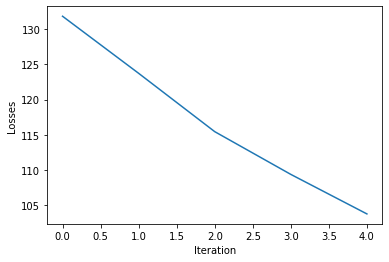

In [14]:
#4. test with test set, and prine sklearn.metric classification reports, as well skelarn.metrics confusion matrix
    #use argmax, because your test set i NOT one-hot encoded
model = MultinomialLogisticRegression()
train_losses = model.fit(X_train,y_train)
ypred = model.predict(X_test)
#4.1 optional plooting 
plt.plot(train_losses)
plt.xlabel("Iteration")
plt.ylabel("Losses")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.32      1.00      0.48         6
           2       0.00      0.00      0.00        13

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

AxesSubplot(0.125,0.125;0.62x0.755)


c:\Python3.10.4\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python3.10.4\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python3.10.4\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


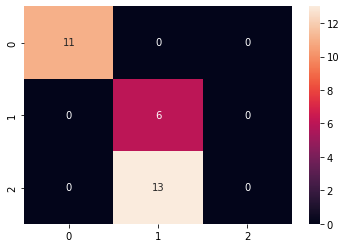

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
print(classification_report(y_test,ypred))
# print(confusion_matrix(y_test,ypred))
print(sns.heatmap(confusion_matrix(y_test,ypred),annot=True))

In [16]:
y_test.shape,ypred.shape

((30,), (30,))

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

AxesSubplot(0.125,0.125;0.62x0.755)
0.5666666666666667


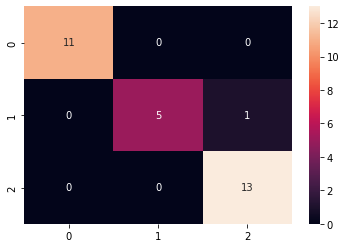

In [28]:
#5. compare your results with sklearn.linear_model.LogistricRegression()
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred_sk = lr.predict(X_test)

print(classification_report(y_test,ypred_sk))
print(sns.heatmap(confusion_matrix(y_test,ypred_sk),annot=True))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))